In [1]:
import numpy as np 
import pandas as pd 
import scipy
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from __future__ import print_function, division

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import datetime
import sys
import os

In [2]:

%matplotlib inline
import nibabel as nib
import glob
import tensorflow as tf


In [ ]:
y1 = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa_data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/image_flair_combined.npy')
y2 = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa_data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/image_t1ce_combined.npy')
x_train = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa_data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/mask_combined.npy')
#y_test = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/val_masks.npy')

In [ ]:
x_train.shape, y1.shape, y2.shape

In [4]:
import random

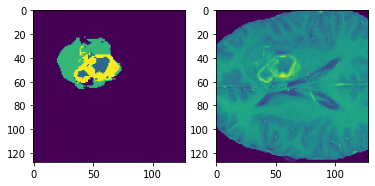

In [5]:
n = random.randint(30,100)
x = random.randint(0,210)

plt.subplot(121)
plt.imshow(x_train[x,:,:,n])
plt.subplot(122)
plt.imshow(y2[x,:,:,n])

In [6]:
image2D = []
for i in range(210):
  for j in range(128):
    image2D.append(x_train[i,:,:,j])

#x_train = np.array(image2D)

In [7]:
mask2D = []
for i in range(210):
  for j in range(128):
    mask2D.append(y1[i,:,:,j])
#y_train = np.array(mask2D)

In [8]:
for i in range(210):
  for j in range(128):
    mask2D.append(y2[i,:,:,j])
#y_train = np.array(mask2D)

In [9]:
for i in range(210):
  for j in range(128):
    image2D.append(x_train[i,:,:,j])

In [10]:
x = np.array(image2D)
z = np.array(mask2D)

In [11]:
x.shape, z.shape

((53760, 128, 128), (53760, 128, 128))

In [ ]:
x_train.shape, y1.shape

<function matplotlib.pyplot.imshow>

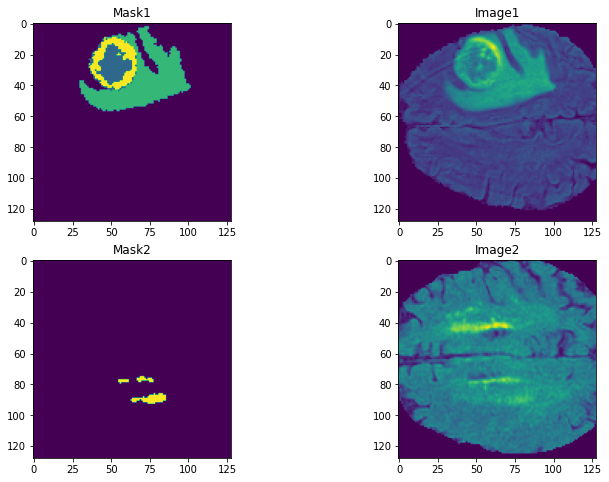

In [16]:
rand=np.random.randint(0,53760 )
rand_2=np.random.randint(0,53760)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Mask1')
plt.imshow(x[rand,:,:])
plt.subplot(222)
plt.title('Image1')
plt.imshow(z[rand,:,:])

plt.subplot(223)
plt.title('Mask2')
plt.imshow(x[rand_2,:,:])
plt.subplot(224)
plt.title('Image2')
plt.imshow(z[rand_2,:,:])

plt.imshow

In [ ]:
del yy

In [17]:
train=[]
image=[]
for i in range(x.shape[0]):
  b=x[i]
  cc=z[i]
  if (np.max(b)>0):
    train.append(b)
    image.append(cc)




In [18]:
x_train = np.array(train)
y_train = np.array(image)

In [19]:
x_train.shape, y_train.shape

((28052, 128, 128), (28052, 128, 128))

In [ ]:
del y1, y2, x, z

In [ ]:
del image2D, mask2D

In [22]:
val, counts = np.unique(x_train, return_counts=True)

In [23]:
xx = (counts[0]/np.sum(counts))

In [24]:
xx

0.9157588125958043

In [21]:
len(x_train)

28052

In [27]:
msk = []
img = []
for i in range(len(x_train)):
  val, counts = np.unique(x_train[i], return_counts=True)
  if((counts[0]/np.sum(counts))<0.97):
    msk.append(x_train[i])
    img.append(y_train[i])



In [28]:
xx = np.array(msk)
yy = np.array(img)
xx.shape, yy.shape

((20380, 128, 128), (20380, 128, 128))

In [ ]:
val, counts = np.unique(x_train, return_counts=True)
 

train=[]
image=[]
for i in range(x_train.shape[0]):
  b=x_train[i]
  cc=y_train[i]
  if (1 - (counts[0]/counts.sum())) > 0.05:

    train.append(b)
    image.append(cc)


In [29]:
x_train = xx
y_train = yy

In [30]:
x_train.shape, y_train.shape

((20380, 128, 128), (20380, 128, 128))

In [31]:
del train
del image

In [32]:
del y1
del y2
del x
del z
del image2D
del mask2D

In [33]:
del msk, img

<function matplotlib.pyplot.imshow>

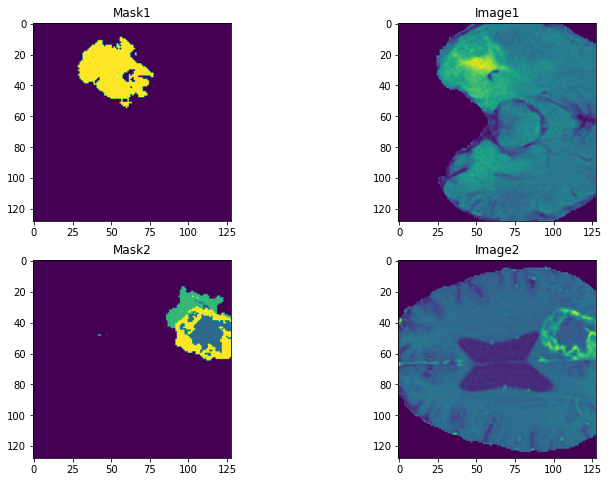

In [34]:
rand=np.random.randint(0,20380 )
rand_2=np.random.randint(0,20380)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Mask1')
plt.imshow(x_train[rand,:,:])
plt.subplot(222)
plt.title('Image1')
plt.imshow(y_train[rand,:,:])

plt.subplot(223)
plt.title('Mask2')
plt.imshow(x_train[rand_2,:,:])
plt.subplot(224)
plt.title('Image2')
plt.imshow(y_train[rand_2,:,:])

plt.imshow

In [35]:
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import BatchNormalization
#from keras import layers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [36]:
x_train.shape, y_train.shape


((20380, 128, 128), (20380, 128, 128))

In [ ]:
rand=np.random.randint(0,28052 )
rand_2=np.random.randint(0,28052)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Mask1')
plt.imshow(x_train[rand,:,:])
plt.subplot(222)
plt.title('Image1')
plt.imshow(y_train[rand,:,:])

plt.subplot(223)
plt.title('Mask2')
plt.imshow(x_train[rand_2,:,:])
plt.subplot(224)
plt.title('Image2')
plt.imshow(y_train[rand_2,:,:])

plt.imshow

In [37]:

from tensorflow.keras.utils import to_categorical



In [38]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.10)

In [39]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((18342, 128, 128), (2038, 128, 128), (18342, 128, 128), (2038, 128, 128))

In [ ]:
rand=np.random.randint(0,25246 )
rand_2=np.random.randint(0,2806)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Mask1')
plt.imshow(x_train[rand,:,:])
plt.subplot(222)
plt.title('Image1')
plt.imshow(y_train[rand,:,:])

plt.subplot(223)
plt.title('Mask2')
plt.imshow(x_val[rand_2,:,:])
plt.subplot(224)
plt.title('Image2')
plt.imshow(y_val[rand_2,:,:])

plt.imshow

In [40]:
y_train = np.expand_dims(y_train, axis = 3)
y_val = np.expand_dims(y_val, axis = 3)

In [41]:
x_train = tf.keras.utils.to_categorical(x_train)
x_val = tf.keras.utils.to_categorical(x_val)

In [42]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((18342, 128, 128, 4),
 (2038, 128, 128, 4),
 (18342, 128, 128, 1),
 (2038, 128, 128, 1))

<function matplotlib.pyplot.imshow>

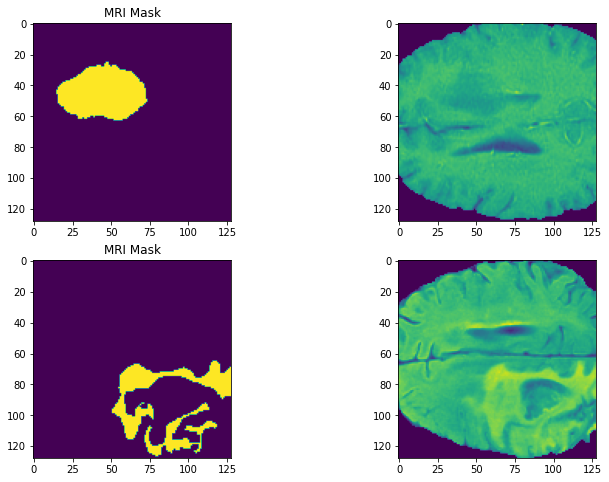

In [43]:
rand=np.random.randint(0,18342 )
rand_2=np.random.randint(0,2038)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('MRI Mask')
plt.imshow(x_train[rand,:,:,2])
plt.subplot(222)
plt.imshow(y_train[rand,:,:,0])

plt.subplot(223)
plt.title('MRI Mask')
plt.imshow(x_train[rand_2,:,:,2])
plt.subplot(224)
plt.imshow(y_train[rand_2,:,:,0])

plt.imshow

In [ ]:
val_x = x_val
train_x = x_train

In [44]:
x_val = x_val[:,:,:,2]
x_val = np.expand_dims(x_val, axis = 3)
x_val.shape

(2038, 128, 128, 1)

In [ ]:
X = np.arange(12).reshape((2,2,3))

In [ ]:
X

In [ ]:
reduced_array = X[:, :, :-1]

In [ ]:
reduced_array.shape

In [ ]:
reduced_array

In [45]:
x_train = x_train[:,:,:,2]
x_train = np.expand_dims(x_train, axis = 3)
x_train.shape

(18342, 128, 128, 1)

In [46]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((18342, 128, 128, 1),
 (2038, 128, 128, 1),
 (18342, 128, 128, 1),
 (2038, 128, 128, 1))

In [ ]:
rand=np.random.randint(0,13230 )
rand_2=np.random.randint(0,1470)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('MRI Mask')
plt.imshow(x_train[rand,:,:,0])
plt.subplot(222)
plt.imshow(y_train[rand,:,:,0])

plt.subplot(223)
plt.title('MRI Mask')
plt.imshow(x_train[rand_2,:,:,0])
plt.subplot(224)
plt.imshow(y_train[rand_2,:,:,0])

plt.imshow

In [47]:
def load_batch(batch_size=1):

  for i in range(0, len(x_train), batch_size):
    img_B = x_train[i:i+batch_size,:,:,:]
    img_A = y_train[i:i+batch_size,:,:,:]
    
    yield img_A, img_B
    #return img_A, img_B


In [48]:
def build_generator():
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4, bn=True):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = BatchNormalization(momentum=0.8)(u)
            u = Concatenate()([u, skip_input]) #skip connection
            return u

        
        d0 = Input(shape=img_shape)

        # Downsampling
        d1 = conv2d(d0, gf, bn=False)
        d2 = conv2d(d1, gf*2)
        d3 = conv2d(d2, gf*4)
        d4 = conv2d(d3, gf*8)
        d5 = conv2d(d4, gf*8)
        d6 = conv2d(d5, gf*8)
        d7 = conv2d(d6, gf*8)

        # Upsampling
        u1 = deconv2d(d7, d6, gf*8)
        u2 = deconv2d(u1, d5, gf*8)
        u3 = deconv2d(u2, d4, gf*8)
        u4 = deconv2d(u3, d3, gf*4)
        u5 = deconv2d(u4, d2, gf*2)
        u6 = deconv2d(u5, d1, gf)

        u7 = UpSampling2D(size=2)(u6)
        output_img = Conv2D(channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u7)

        return Model(d0, output_img)

In [49]:
def build_discriminator():
        # a small function to make one layer of the discriminator
        def d_layer(layer_input, filters, f_size=4, bn=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        img_A = Input(shape=img_shape)
        img_B = Input(shape=img_shape)

        # Concatenate image and conditioning image by channels to produce input
        combined_imgs = Concatenate(axis=-1)([img_A, img_B])

        d1 = d_layer(combined_imgs, df, bn=False)
        d2 = d_layer(d1, df*2)
        d3 = d_layer(d2, df*4)
        d4 = d_layer(d3, df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model([img_A, img_B], validity)

In [50]:
img_rows = 128
img_cols = 128
channels = 1
img_shape = (img_rows, img_cols, channels)


# Calculate output shape of D (PatchGAN)
patch = int(img_rows / 2**4)
disc_patch = (patch, patch, 1)

# Number of filters in the first layer of G and D
gf = 64
df = 64

optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Input images and their conditioning images
img_A = Input(shape=img_shape)
img_B = Input(shape=img_shape)

# By conditioning on B generate a fake version of A
fake_A = generator(img_B)

# For the combined model we will only train the generator
discriminator.trainable = False

# Discriminators determines validity of translated images / condition pairs
valid = discriminator([fake_A, img_B])

combined = Model(inputs=[img_A, img_B], outputs=[valid, fake_A])
combined.compile(loss=['mse', 'mae'],
                              loss_weights=[1, 100],
                              optimizer=optimizer, run_eagerly=True)

In [51]:
combined.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 128, 128, 1)  41837185    ['input_5[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                            

In [52]:
def show_images(batch_i):
        
        r, c = 3, 3

        batch_i = 3

        rand_ = random.randint(0,(len(x_val)-batch_i))

        imgs_B, imgs_A = x_val[rand_:rand_+batch_i,:,:,:], y_val[rand_:rand_+batch_i,:,:,:]
        fake_A = generator.predict(imgs_B)

        gen_imgs = np.concatenate([imgs_B[:,:,:,0], fake_A[:,:,:,0], imgs_A[:,:,:,0]])

        # Rescale images 0 - 1
        #gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Input', 'Output', 'Ground Truth']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        plt.figure(figsize=(12, 8))
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[i])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()

In [53]:
def train(epochs, batch_size=1, show_interval=10):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + disc_patch)
        fake = np.zeros((batch_size,) + disc_patch)

        for epoch in range(epochs):
            for batch_i, (imgs_A, imgs_B) in enumerate(load_batch(batch_size)):

                
                #  Train Discriminator
                

                # Condition on B and generate a translated version
                fake_A = generator.predict(imgs_B)

                # Train the discriminators (original images = real / generated = Fake)
                d_loss_real = discriminator.train_on_batch([imgs_A, imgs_B], valid)
                d_loss_fake = discriminator.train_on_batch([fake_A, imgs_B], fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

               
                #  Train Generator
                g_loss = combined.train_on_batch([imgs_A, imgs_B], [valid, imgs_A])

                elapsed_time = datetime.datetime.now() - start_time
                
            # Plot the progress
            #if epoch%10==0:
            print ("[Epoch %d/%d]  [D loss: %f, acc: %3d%%] [G loss: %f] time: %s" % (epoch, epochs,
                                                                        
                                                                    d_loss[0], 100*d_loss[1],
                                                                    g_loss[0],
                                                                    elapsed_time))
            # If at show interval => show generated image samples
            if epoch % show_interval == 0:
                    show_images(batch_i)

In [54]:
train(epochs=50, batch_size=32, show_interval=1)

ValueError: ignored